## Support Vector Machine

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs

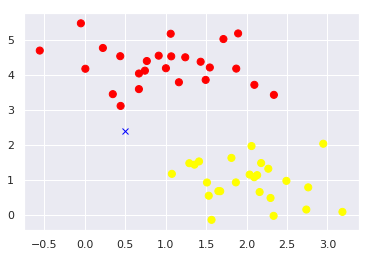

In [2]:
X,Y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=.6) #cluster_std=desviacion std

plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='autumn')
plt.plot([.5],[2.4],'x',color='blue')

## Maximizacion del margen (Representacion Grafica)

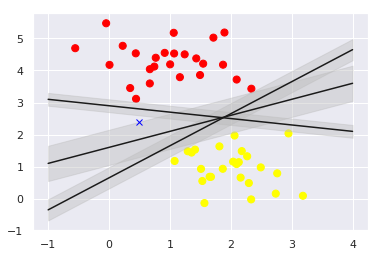

In [3]:
x_plot=np.linspace(-1,4)

plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='autumn')
plt.plot([.5],[2.4],'x',color='blue')

for a, b, d in [(1,0.65, 0.33), (0.5, 1.6,0.55), (-0.2, 2.9, 0.2)]:
    y_plot = a * x_plot + b
    plt.plot(x_plot, y_plot, "-k")
    plt.fill_between(x_plot, y_plot-d, y_plot+d, edgecolor='none', color="#BBBBBB", alpha = 0.4) #ancho del vector
    

## Creacion del modelo

In [4]:
from sklearn.svm import SVC

In [5]:
model=SVC(kernel='linear',C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    #Evaluamos el modelo
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    print('Vectores de Soporte: ',model.support_vectors_)
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=100, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

Vectores de Soporte:  [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


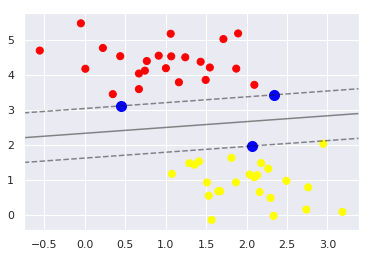

In [7]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)